In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv('./RTA Dataset.csv')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

C:\Users\Nino\AppData\Local\Temp\ipykernel_5676\1004042148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Accident_severity', data=df, palette='viridis')


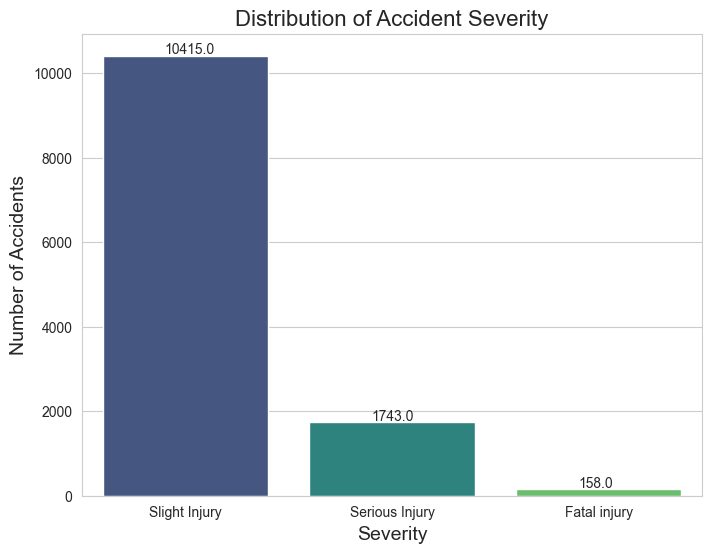

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Accident_severity', data=df, palette='viridis')

plt.title('Distribution of Accident Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))

plt.show()

C:\Users\Nino\AppData\Local\Temp\ipykernel_5676\3224022769.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_week', data=df, order=days_order, palette='muted')


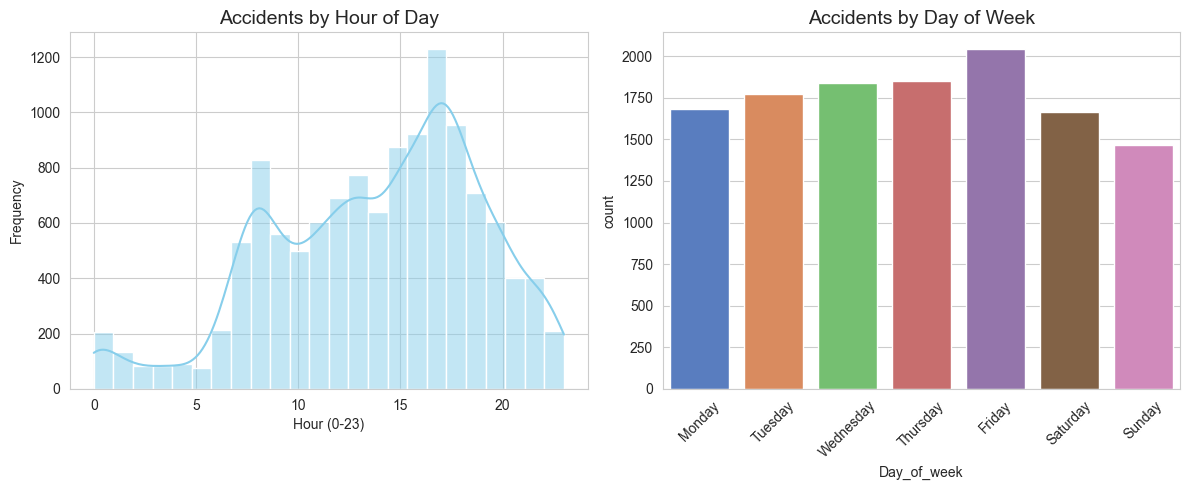

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=24, kde=True, color='skyblue')
plt.title('Accidents by Hour of Day', fontsize=14)
plt.xlabel('Hour (0-23)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Day_of_week', data=df, order=days_order, palette='muted')
plt.title('Accidents by Day of Week', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

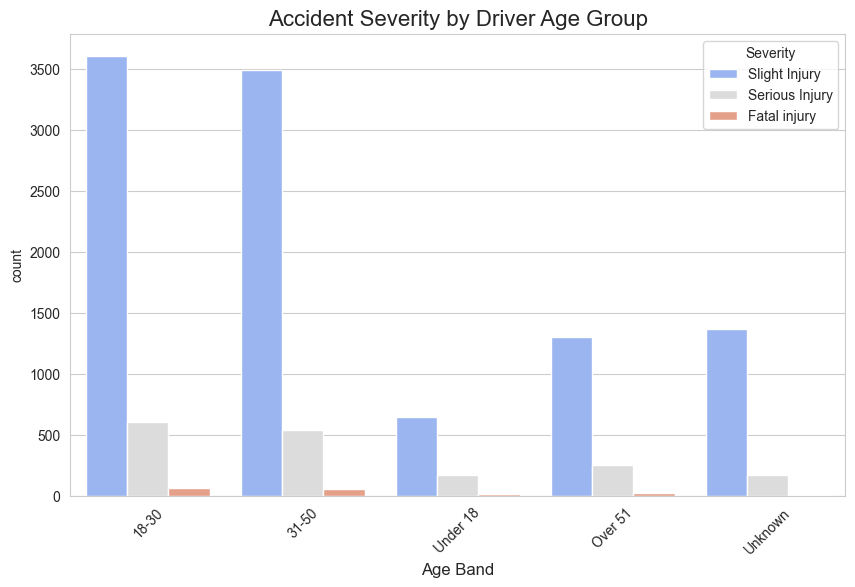

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Age_band_of_driver', data=df, hue='Accident_severity', palette='coolwarm')

plt.title('Accident Severity by Driver Age Group', fontsize=16)
plt.xlabel('Age Band', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()

C:\Users\Nino\AppData\Local\Temp\ipykernel_5676\47127890.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cause_of_accident', data=df, order=top_causes, palette='magma')


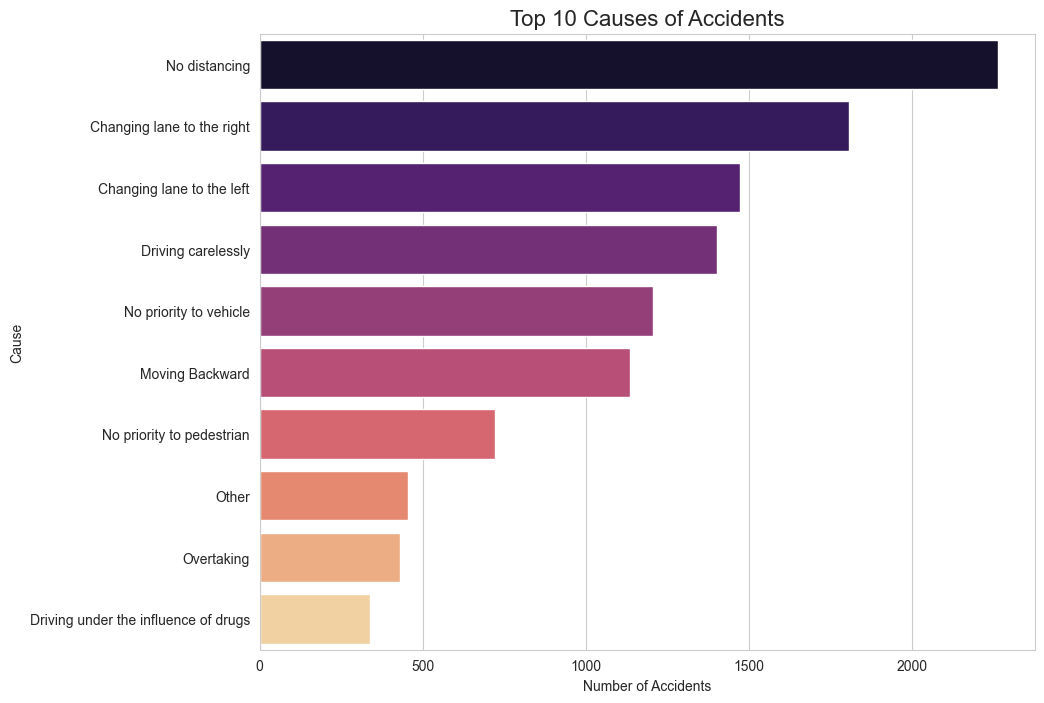

In [ ]:
plt.figure(figsize=(10, 8))

top_causes = df['Cause_of_accident'].value_counts().nlargest(10).index

sns.countplot(y='Cause_of_accident', data=df, order=top_causes, palette='magma')
plt.title('Top 10 Causes of Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Cause')
plt.show()

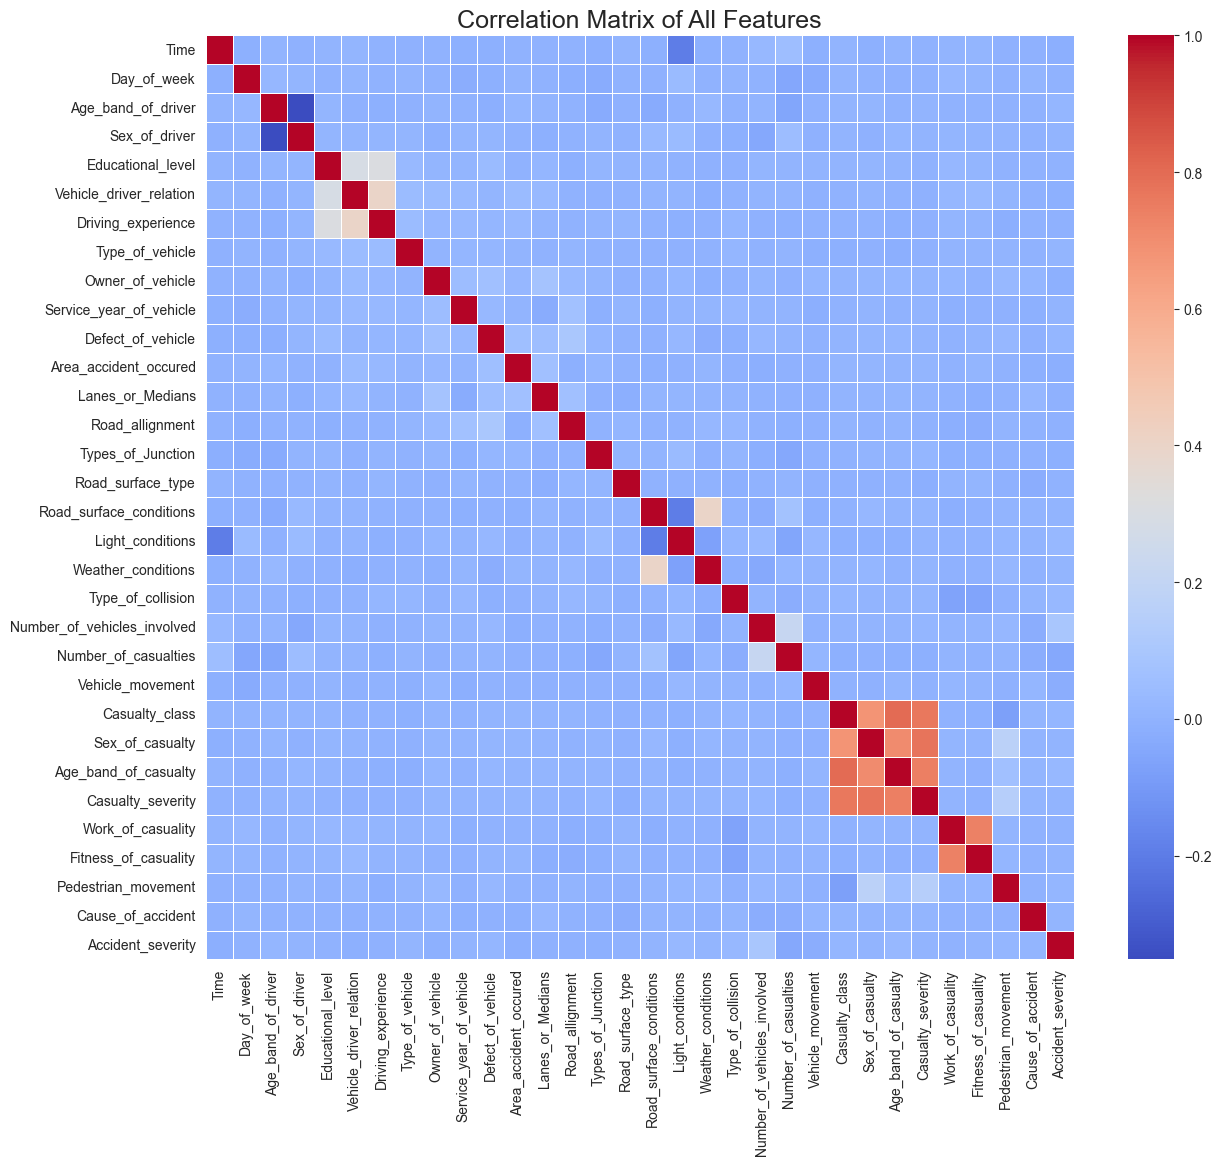

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

corr_matrix = df_encoded.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Features', fontsize=18)
plt.show()

<Figure size 1200x800 with 0 Axes>

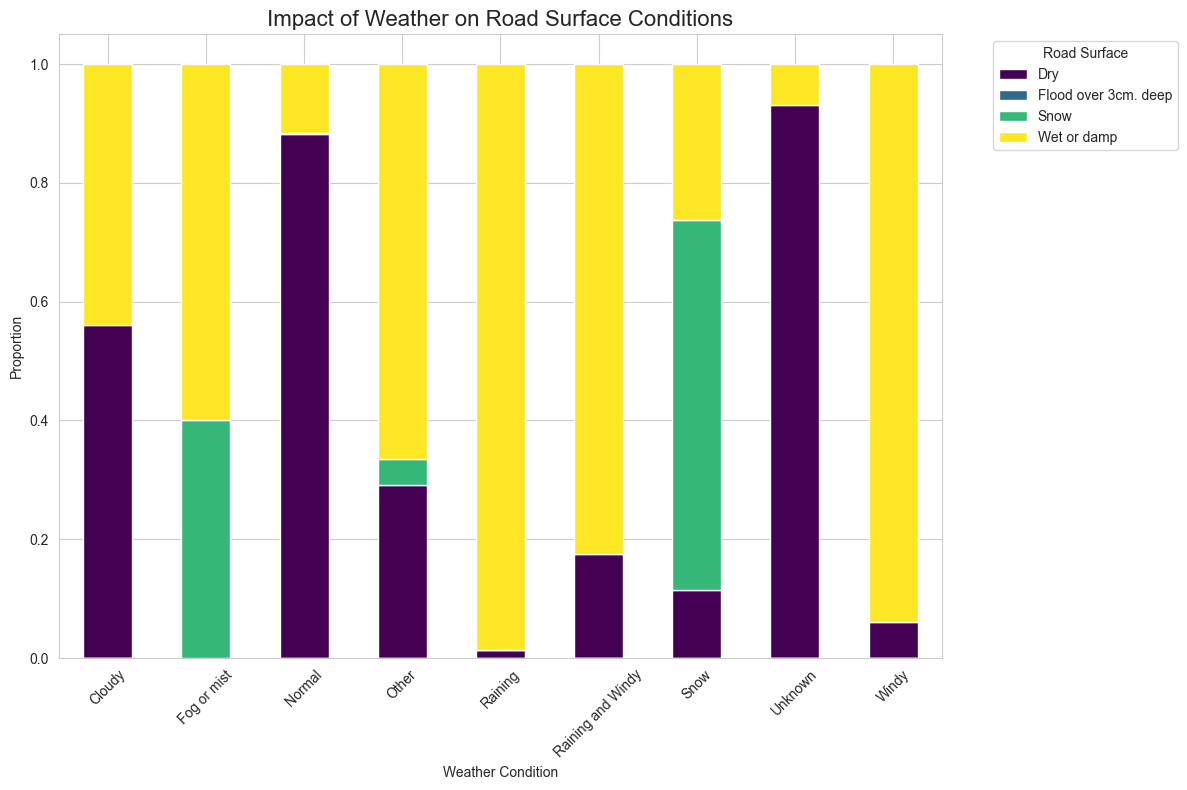

In [ ]:
weather_road = pd.crosstab(df['Weather_conditions'], df['Road_surface_conditions'])

weather_road_pct = weather_road.div(weather_road.sum(1), axis=0)

plt.figure(figsize=(12, 8))
weather_road_pct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,8))

plt.title('Impact of Weather on Road Surface Conditions', fontsize=16)
plt.xlabel('Weather Condition')
plt.ylabel('Proportion')
plt.legend(title='Road Surface', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Nino\AppData\Local\Temp\ipykernel_5676\3738529532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=df, palette='Set2')


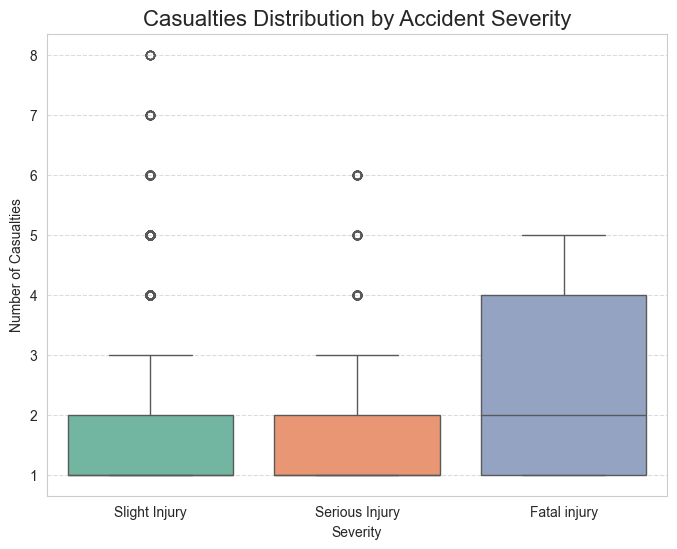

In [28]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=df, palette='Set2')

plt.title('Casualties Distribution by Accident Severity', fontsize=16)
plt.xlabel('Severity')
plt.ylabel('Number of Casualties')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

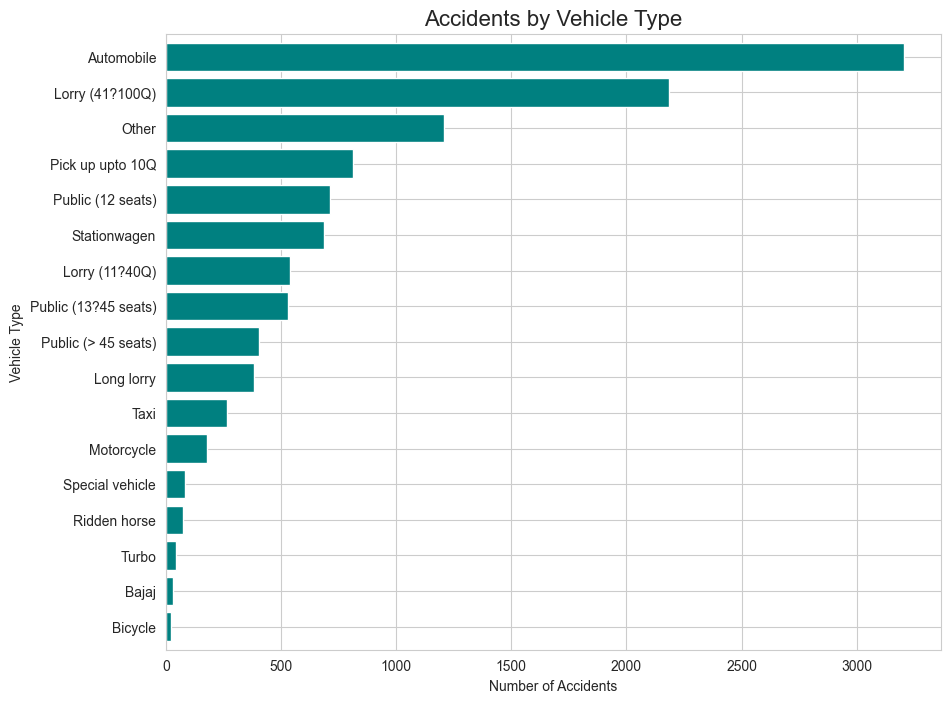

In [ ]:
plt.figure(figsize=(10, 8))

vehicle_counts = df['Type_of_vehicle'].value_counts().sort_values(ascending=True)

vehicle_counts.plot(kind='barh', color='teal', width=0.8)

plt.title('Accidents by Vehicle Type', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Vehicle Type')
plt.show()

C:\Users\Nino\AppData\Local\Temp\ipykernel_5676\3578512046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


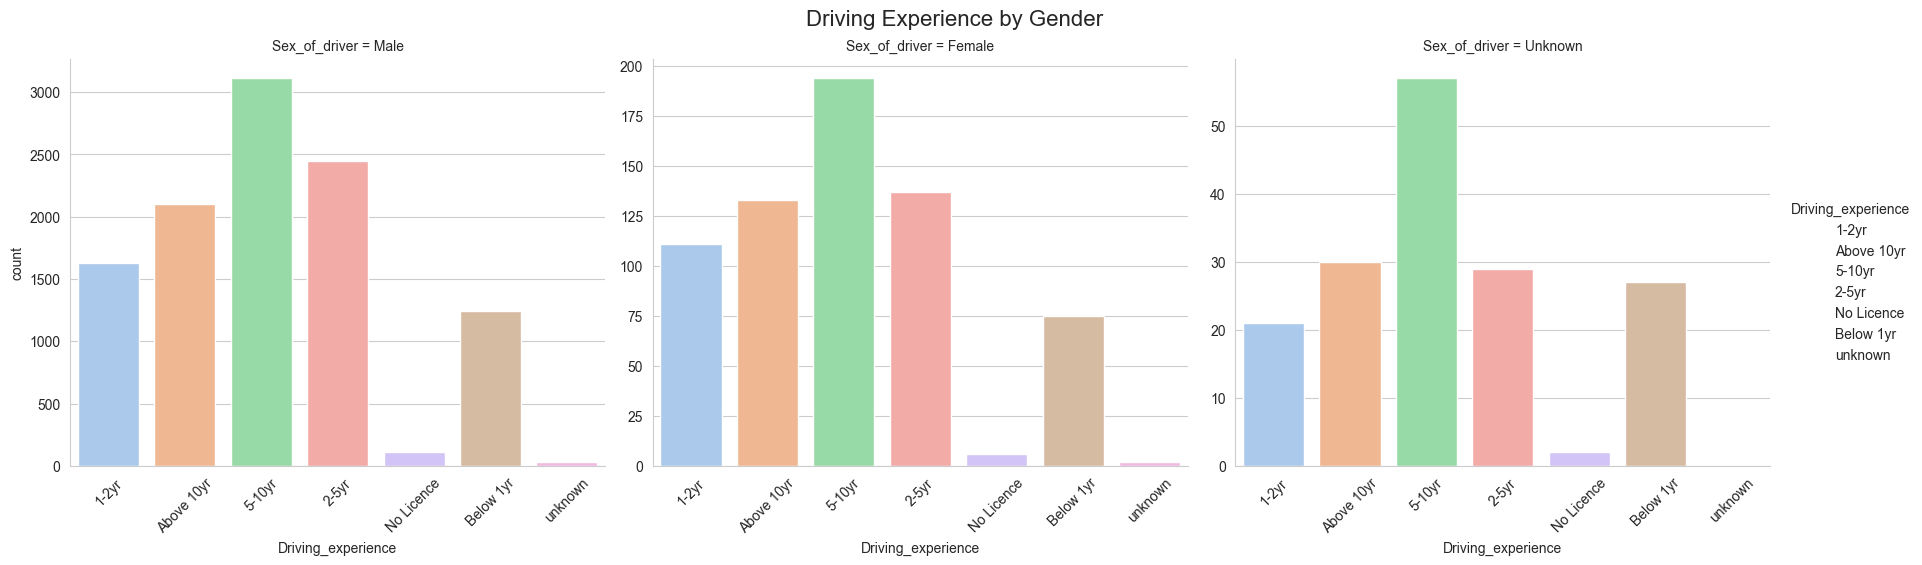

In [ ]:
g = sns.catplot(
    x='Driving_experience', 
    kind='count', 
    col='Sex_of_driver', 
    data=df, 
    palette='pastel',
    height=5, 
    aspect=1.2,
    sharey=False 
)

g.set_xticklabels(rotation=45)
g.fig.suptitle('Driving Experience by Gender', y=1.03, fontsize=16)
plt.show()

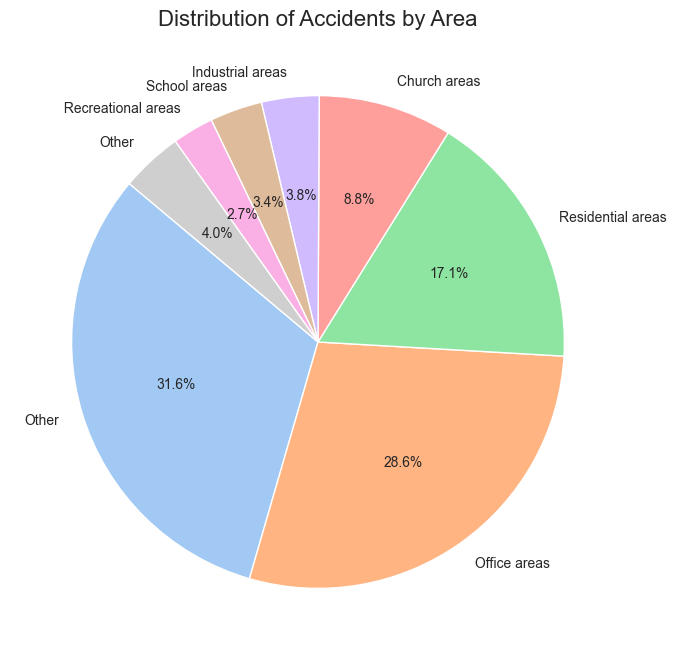

In [ ]:
plt.figure(figsize=(10, 8))

area_counts = df['Area_accident_occured'].value_counts()
top_areas = area_counts.head(7)
other_count = area_counts.iloc[7:].sum()

plot_data = pd.concat([top_areas, pd.Series({'Other': other_count})])

plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Accidents by Area', fontsize=16)
plt.show()

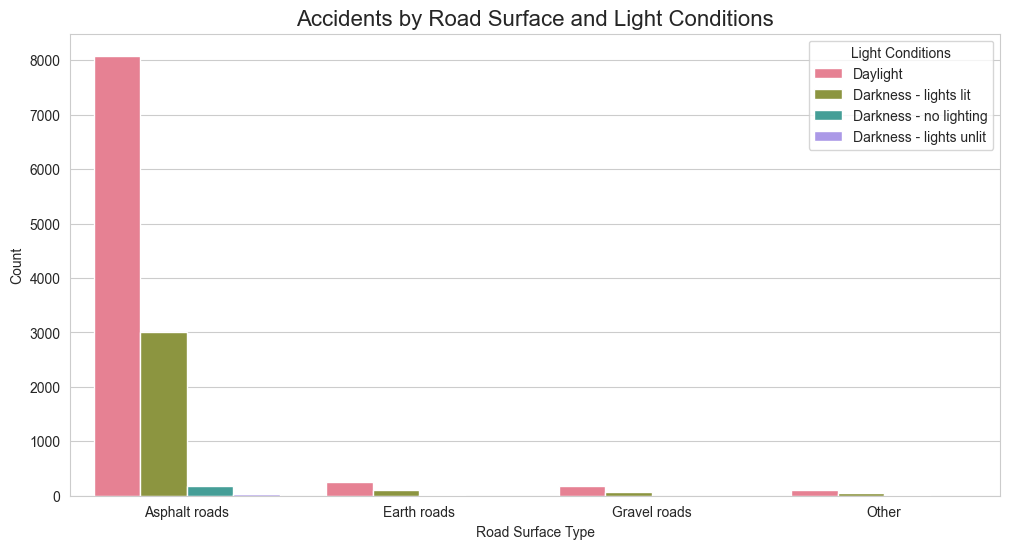

In [ ]:
plt.figure(figsize=(12, 6))

top_surfaces = df['Road_surface_type'].value_counts().nlargest(4).index
df_filtered = df[df['Road_surface_type'].isin(top_surfaces)]

sns.countplot(x='Road_surface_type', hue='Light_conditions', data=df_filtered, palette='husl')

plt.title('Accidents by Road Surface and Light Conditions', fontsize=16)
plt.xlabel('Road Surface Type')
plt.ylabel('Count')
plt.legend(title='Light Conditions')
plt.show()

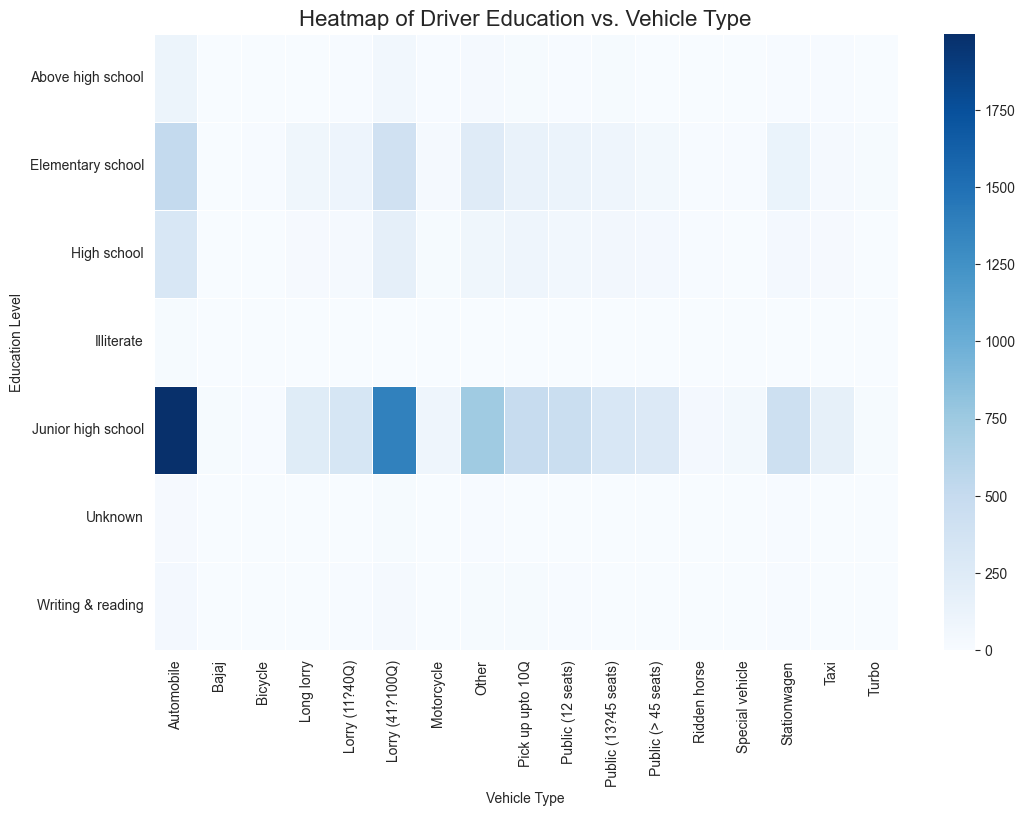

In [ ]:
edu_vehicle = pd.crosstab(df['Educational_level'], df['Type_of_vehicle'])

plt.figure(figsize=(12, 8))
sns.heatmap(edu_vehicle, cmap='Blues', annot=False, linewidths=.5)

plt.title('Heatmap of Driver Education vs. Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type')
plt.ylabel('Education Level')
plt.show()

C:\Users\Nino\AppData\Local\Temp\ipykernel_5676\4053593873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Defect_of_vehicle', data=df, palette='rocket', order=df['Defect_of_vehicle'].value_counts().index)


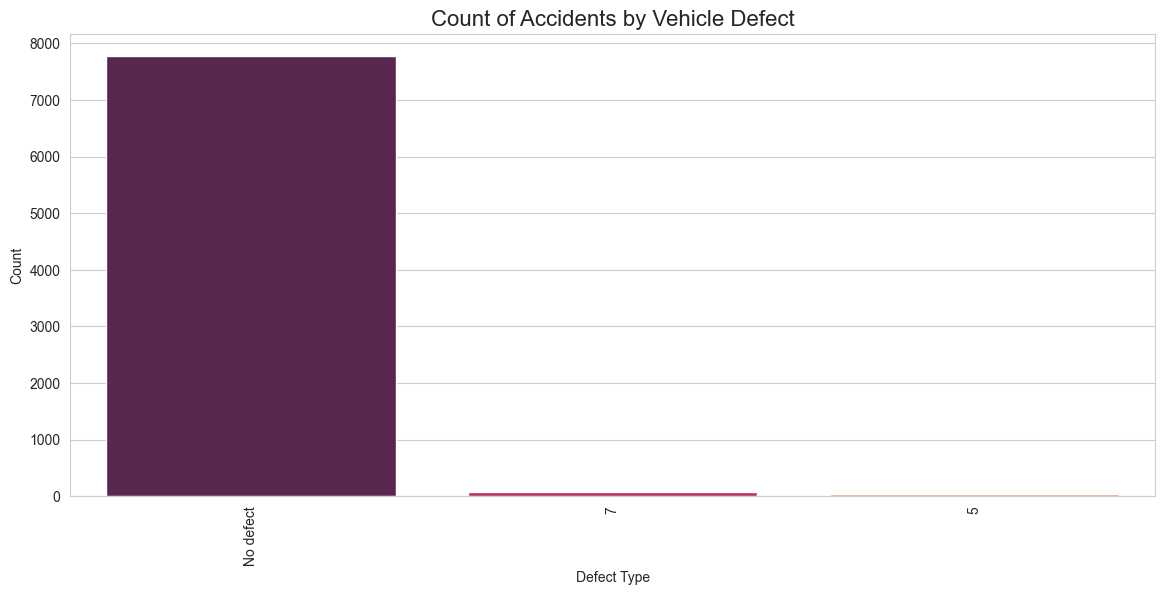

In [ ]:
plt.figure(figsize=(14, 6))

sns.countplot(x='Defect_of_vehicle', data=df, palette='rocket', order=df['Defect_of_vehicle'].value_counts().index)

plt.title('Count of Accidents by Vehicle Defect', fontsize=16)
plt.xlabel('Defect Type')
plt.xticks(rotation=90) 
plt.ylabel('Count')
plt.show()

C:\Users\Nino\AppData\Local\Temp\ipykernel_5676\2311999511.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sex_of_driver', data=drunk_df, palette='coolwarm')


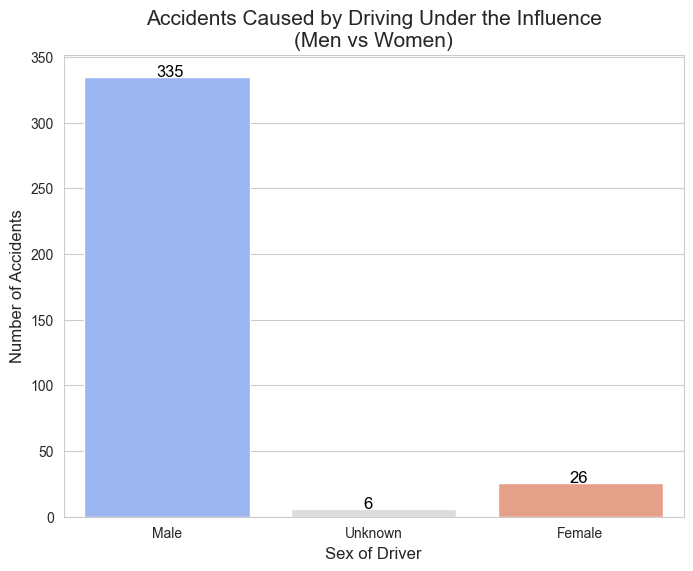

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

drunk_df = df[df['Cause_of_accident'].str.contains('influence|alcohol|drunk', case=False, na=False)]

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Sex_of_driver', data=drunk_df, palette='coolwarm')

plt.title('Accidents Caused by Driving Under the Influence\n(Men vs Women)', fontsize=15)
plt.xlabel('Sex of Driver', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + 0.35, p.get_height() + 0.1),
                    fontsize=12, color='black')

plt.show()

C:\Users\Nino\AppData\Local\Temp\ipykernel_5676\3448989393.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Group', y='Count', data=plot_data, palette=colors)


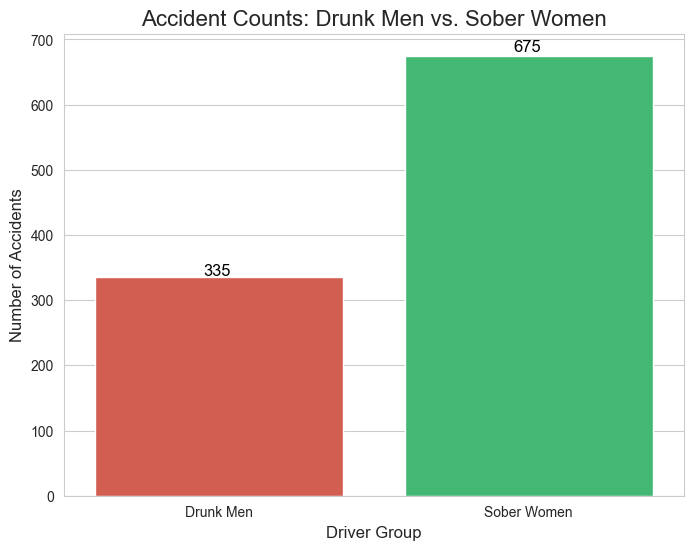

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

drunk_men_filter = (df['Sex_of_driver'] == 'Male') & \
                   (df['Cause_of_accident'].str.contains('influence|alcohol|drunk', case=False, na=False))

sober_women_filter = (df['Sex_of_driver'] == 'Female') & \
                     (~df['Cause_of_accident'].str.contains('influence|alcohol|drunk', case=False, na=False))

count_drunk_men = df[drunk_men_filter].shape[0]
count_sober_women = df[sober_women_filter].shape[0]

plot_data = pd.DataFrame({
    'Group': ['Drunk Men', 'Sober Women'],
    'Count': [count_drunk_men, count_sober_women]
})

plt.figure(figsize=(8, 6))

colors = ['#e74c3c', '#2ecc71'] 
ax = sns.barplot(x='Group', y='Count', data=plot_data, palette=colors)

plt.title('Accident Counts: Drunk Men vs. Sober Women', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Driver Group', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + 0.35, p.get_height() + (p.get_height()*0.01)),
                fontsize=12, color='black')

plt.show()